In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import statsmodels.api as sm
import matplotlib.pyplot as plt

gld = pd.read_csv('GLD.csv', index_col = 0, parse_dates = True)
gdx = pd.read_csv('GDX.csv', index_col = 0, parse_dates = True)

In [2]:
print(gld.info())
print(gld[0:10])
print(gdx.info())
print(gdx[0:10])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385 entries, 2006-05-22 to 2007-11-29
Data columns (total 6 columns):
Open         385 non-null float64
High         385 non-null float64
Low          385 non-null float64
Close        385 non-null float64
Adj Close    385 non-null float64
Volume       385 non-null int64
dtypes: float64(5), int64(1)
memory usage: 21.1 KB
None
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-05-22  64.419998  65.419998  63.799999  65.300003  65.300003  11977700
2006-05-23  65.989998  67.160004  65.910004  66.379997  66.379997  10509700
2006-05-24  64.830002  65.160004  63.220001  64.059998  64.059998  11065600
2006-05-25  64.120003  64.760002  63.759998  64.699997  64.699997   6505400
2006-05-26  65.010002  65.099998  63.750000  65.099998  65.099998   5265900
2006-05-30  65.199997  66.239998  65.000000  65.110001  65.110001   8240200
2006-05-31 

In [3]:
OBS = 252
y = np.array(gld['Adj Close'][0:OBS])
x = np.array(gdx['Adj Close'][0:OBS])
X = sm.add_constant(x)


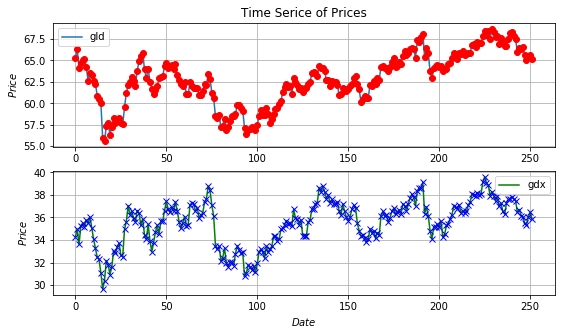

In [20]:
plt.figure(figsize=(9, 5))
plt.subplot(211)
plt.plot(y, lw=1.5, label='gld')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('$Price$')
plt.title('Time Serice of Prices')

plt.subplot(212)
plt.plot(x, 'g', lw=1.5, label='gdx')
plt.plot(x, 'bx')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('$Price$')
plt.xlabel('$Date$')
plt.show()

In [5]:
model = sm.OLS(y, X)
results = model.fit()
hedgeRatio = results.params[1]


In [6]:
results.params

array([17.15193859,  1.2852597 ])

In [7]:
gld_adjClose = gld['Adj Close']
gdx_adjClose = gdx['Adj Close']
spread = gld_adjClose - hedgeRatio * gdx_adjClose
spreadTrain = spread[0:OBS]


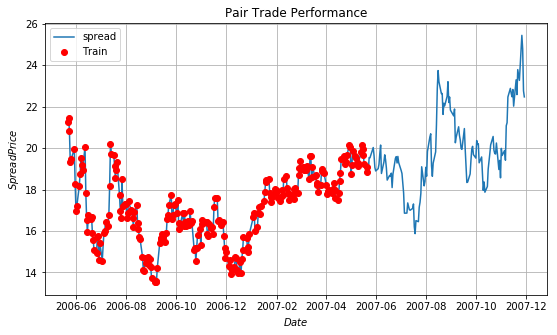

In [17]:
plt.figure(figsize=(9, 5))
plt.plot(spread, lw=1.5, label='spread')
plt.plot(spreadTrain, 'ro', label='Train')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('$Date$')
plt.ylabel('$Spread Price$')
plt.title('Pair Trade Performance')
plt.show()

In [9]:
spreadMean = spreadTrain.mean()
spreadStd = spreadTrain.std()
print(spreadMean)
print(spreadStd)

zscore = (spread - spreadMean) / spreadStd
print(zscore[:10])
print(zscore[-10:])

longs = zscore <= -2
shorts = zscore >= 2
exits = np.abs(zscore) <= 1

positions = np.array(len(spread)*[None, None])
positions.shape = (len(spread), 2)


17.151938587840746
1.7234602680416335
Date
2006-05-22    2.372595
2006-05-23    2.497972
2006-05-24    2.140635
2006-05-25    1.275995
2006-05-26    1.350158
2006-05-30    1.616895
2006-05-31    0.639360
2006-06-01   -0.109890
2006-06-02    0.023527
2006-06-05    0.588337
Name: Adj Close, dtype: float64
Date
2007-11-15    3.295668
2007-11-16    2.828419
2007-11-19    3.565474
2007-11-20    3.151525
2007-11-21    3.852106
2007-11-23    3.550768
2007-11-26    4.812473
2007-11-27    4.426085
2007-11-28    3.257747
2007-11-29    3.087722
Name: Adj Close, dtype: float64


In [10]:
positions

array([[None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None, None],
       [None,

In [11]:
for i, b in enumerate(shorts):
	if b:
		positions[i] = [-1, 1]
		
for i, b in enumerate(longs):
	if b:
		positions[i] = [1, -1]

for i, b in enumerate(exits):
	if b:
		positions[i] = [0, 0]

for i, b in enumerate(positions):
	if b[0] == None :
		positions[i] = positions[i-1]

In [12]:
print(positions[:10])
print(positions[-10:])


[[-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]
 [-1 1]]


In [13]:
OBS = 385
cl1 = np.array(gld['Adj Close'][0:OBS])
cl2 = np.array(gdx['Adj Close'][0:OBS])

ret_cl1 = np.diff(cl1) / cl1[:-1]
ret_cl2 = np.diff(cl2) / cl2[:-1]

dailyret = np.concatenate((ret_cl1, ret_cl2), axis=0)
dailyret = np.reshape(dailyret, (OBS-1, 2), order = 'F')


In [14]:
dailyret

array([[ 0.01653896,  0.01960807],
       [-0.03495027, -0.03793483],
       [ 0.00999062,  0.04928815],
       [ 0.0061824 ,  0.00600198],
       [ 0.00015366, -0.00985744],
       [-0.01351556,  0.01781533],
       [-0.02600034, -0.00823683],
       [ 0.01502556,  0.01557235],
       [-0.00330707, -0.02555584],
       [-0.01169224, -0.02937341],
       [-0.00431655, -0.02350734],
       [-0.02199742, -0.02407303],
       [-0.00755211, -0.00567009],
       [-0.00694792, -0.03678372],
       [-0.06846578, -0.04677317],
       [-0.00536479,  0.02577632],
       [ 0.03056456,  0.05782609],
       [ 0.00628053, -0.01058954],
       [-0.02288486, -0.02805914],
       [ 0.01667846,  0.02202401],
       [ 0.01797562,  0.044263  ],
       [-0.01028634, -0.00613481],
       [ 0.00450376,  0.0179572 ],
       [ 0.00500081,  0.00964743],
       [-0.01029511, -0.03139502],
       [-0.00242717, -0.00479147],
       [ 0.03441083,  0.07504966],
       [ 0.02872984,  0.01949412],
       [ 0.01551527,

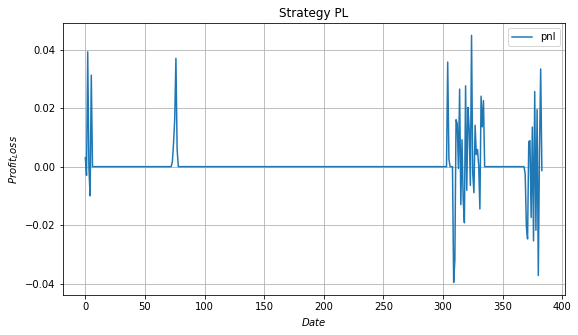

0.2333645617327999
sharpTrainset:  1.9739039675788428
sharpTestset:  1.087713913941673


In [19]:
PL = positions[:-1] * dailyret
pnl = np.sum(PL, axis = 1)
plt.figure(figsize=(9, 5))
plt.plot(pnl, lw=1.5, label='pnl')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('$Date$')
plt.ylabel('$Profit_Loss$')
plt.title('Strategy PL')
plt.show()
total = np.sum(pnl)
print(total)

sharpTrainset = math.sqrt(252)*np.mean(pnl[0:251])/np.std(pnl[0:251])
sharpTestset = math.sqrt(252)*np.mean(pnl[252:OBS-1])/np.std(pnl[252:OBS-1])
print('sharpTrainset: ', sharpTrainset)
print('sharpTestset: ', sharpTestset)